<a href="https://colab.research.google.com/github/jacobiancosine/jacobiancosine/blob/main/Capstone_2023_rev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data File. Initial EDA

In [6]:
#loading up everything that is needed.
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [7]:
#access personal drive for data.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#turn csv into dataframe
games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

#local file
#games = pd.read_csv('games.csv')

In [9]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# EDA

In [10]:
games.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.858100e+04,78581.000000,78581.000000,78581.000000,78581.000000,78581.000000,78581.000000,7.858100e+04,78581.000000,44.000000,78581.000000,7.858100e+04,78581.000000,78581.000000,78581.000000,78581.000000
mean,1.266629e+06,138.883051,0.329253,7.104333,0.573625,3.591861,0.043127,1.028846e+03,170.194653,98.909091,20.723165,8.295522e+02,112.196409,11.210954,99.838765,12.011020
std,6.402733e+05,5577.198496,2.311860,11.049926,14.268964,15.938915,1.863819,2.534235e+04,4755.704133,0.857747,178.311718,1.861140e+04,1187.518506,195.629768,1571.243342,212.201878
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.315100e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.239050e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,8.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.791680e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.200000e+01,16.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.546410e+06,872138.000000,21.000000,999.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [11]:
#check for duplicated
games.duplicated().sum()

0

In [12]:
#info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   About the game              75646 non-null  object 
 9   Supported languages         78581 non-null  object 
 10  Full audio languages        78581 non-null  object 
 11  Reviews                     9518 non-null   object 
 12  Header image                78581 non-null  object 
 13  Website                     375

In [13]:
games.isnull().sum().sort_values()

AppID                             0
Median playtime two weeks         0
Median playtime forever           0
Average playtime two weeks        0
Average playtime forever          0
Recommendations                   0
Achievements                      0
Negative                          0
Positive                          0
User score                        0
Linux                             0
Mac                               0
Windows                           0
Metacritic score                  0
Required age                      0
Header image                      0
Full audio languages              0
Supported languages               0
DLC count                         0
Price                             0
Release date                      0
Peak CCU                          0
Estimated owners                  0
Name                              6
Screenshots                    1640
Genres                         2926
About the game                 2935
Developers                  

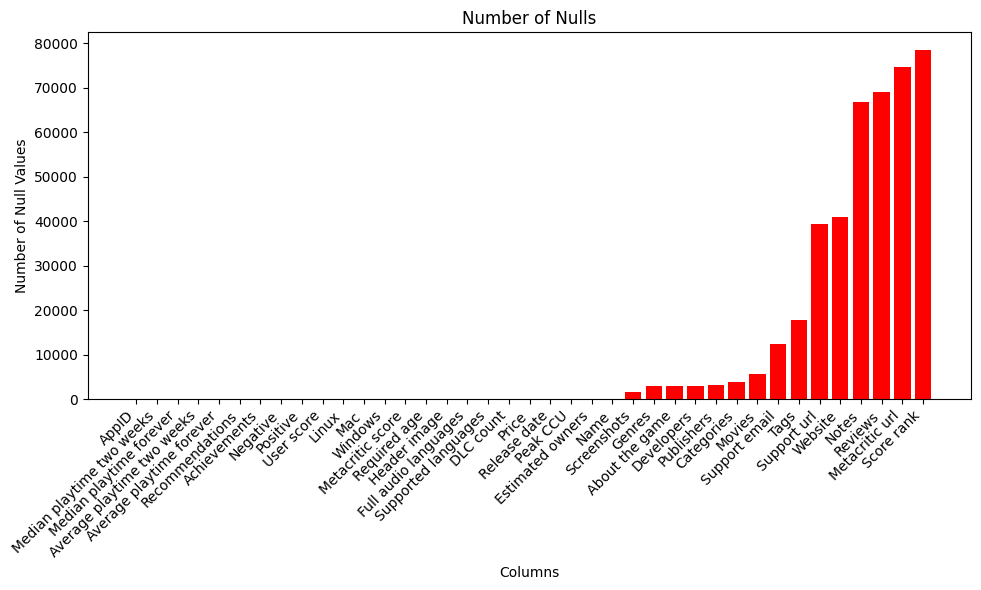

In [14]:
#display nulls as a graph

null_counts = games.isnull().sum().sort_values() # sort values in ascending order


plt.figure(figsize=(10,6))
plt.bar(null_counts.index, null_counts.values, color = 'red')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Nulls')
plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
plt.tight_layout()
plt.show()

**Columns to keep for sure even though we have some nulls:**

*   Genres
*   Developers
*   Publishers
*   Tags

**Columns to review for dropping:**

*   Screenshots
*   About the Game
*   Movies
*   Support Emails
*   Support url
*   Website
*   Notes
*   Review
*   Metacritic url
*   Scorerank




In [15]:
#let's look at the nulls a little be closer

null_threshold = 6

columns_nulls = games.columns[games.isnull().sum() > null_threshold].tolist()

#need to be careful. It looks like 'Genre', 'Categories' and 'Tags' are needed.

In [16]:
columns_nulls

['About the game',
 'Reviews',
 'Website',
 'Support url',
 'Support email',
 'Metacritic url',
 'Score rank',
 'Notes',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [17]:
# can drop. Might be interesting to do an analysis on this word bubble in a different analysis
games['About the game'].unique

<bound method Series.unique of 0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
2        Jolt Project: The army now has a new robotics ...
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
                               ...                        
78576    Welcome to Desert Spirit Grave (DSG), an immer...
78577    On our Steam discussion boards you will find m...
78578    Протяжный скрип старых лагерных ворот эхом раз...
78579    A treacherous visual novel about friendship, d...
78580    Kayra's nightmare has come true! The evil, lef...
Name: About the game, Length: 78581, dtype: object>

In [18]:
# can drop
games['Screenshots'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_3f370f69eef0caeceb533d06925cc48f0f26c83c.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_3fcd62a2831bcc1e557a0fe2a061b6369ba030d1.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_06a2446b7ccef5eaac1ef4200acdb3f02dac9ae0.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_794a3ecd4ae51313f8cfffbc6b3d8b91c665b12b.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_8907e0a624a1113be01fa1b426d0e3ab0971e7d2.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_191adc1f11bf9d13498cb411ac71f29221732e86.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_04b30aaa0ce083b1bcff63d06432707ab9c35c74.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_7496de2518ddb1b58db0004d1386b4e48c442367.1920x1080.jpg?t=1644931091,https://

In [19]:
#split dataframe
games_with_nulls = games[columns_nulls]
games_without_nulls = games.drop(columns=columns_nulls)

In [20]:
games_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   Supported languages         78581 non-null  object 
 9   Full audio languages        78581 non-null  object 
 10  Header image                78581 non-null  object 
 11  Windows                     78581 non-null  bool   
 12  Mac                         78581 non-null  bool   
 13  Linux                       785

In [21]:
games_with_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   About the game  75646 non-null  object 
 1   Reviews         9518 non-null   object 
 2   Website         37575 non-null  object 
 3   Support url     39140 non-null  object 
 4   Support email   66219 non-null  object 
 5   Metacritic url  3878 non-null   object 
 6   Score rank      44 non-null     float64
 7   Notes           11728 non-null  object 
 8   Developers      75625 non-null  object 
 9   Publishers      75380 non-null  object 
 10  Categories      74654 non-null  object 
 11  Genres          75655 non-null  object 
 12  Tags            60881 non-null  object 
 13  Screenshots     76941 non-null  object 
 14  Movies          72845 non-null  object 
dtypes: float64(1), object(14)
memory usage: 9.0+ MB


#  Review columns to see which I really don't need.

In [22]:
# can drop
games['Support email'].value_counts()

info@bigfishgames.com                             325
mikhail.zverev@8floor.net                         268
business@atomicfabrik.com                         186
contact@exosyphenstudios.com                      153
support@quanticlab.com                            148
                                                 ... 
support@systemic-games.com                          1
info@primegames.bg                                  1
info@escaperealityuk.space                          1
support-deathcollector-steam@choiceofgames.com      1
witchcraftvidgame@gmail.com                         1
Name: Support email, Length: 39022, dtype: int64

In [23]:
# can drop
games['Score rank'].value_counts()

99.0     18
98.0     12
100.0    12
97.0      2
Name: Score rank, dtype: int64

In [24]:
# can drop
games['Notes'].value_counts()

This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                        106
Nakedness. All characters appearing in this game are over 18 years of age.                                                                                                                                                          101
-Nudity or sexual content -Not suitable for watching at work -Not suitable for all ages -All characters in the game are over 18 years old                                                                                            57
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content                                                                          42
This game contains the following sexual content ・Strong language ・Sexual

**Columns to be dropped will be the following:**

* 'About the game'
* 'Reviews'
* 'Website'
* 'Support url'
* 'Support email'
* 'Metacritic url'
* 'Score rank'
* 'Notes'
* 'Screenshots'
* 'Movies'

These columns are mostly text and will not apply to the analysis to be done.




In [25]:
#columns that would be need to be dropped.
drop_me =  ['About the game', 'Reviews', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies']

In [26]:
#dropping unneccessary columns
games = games.drop(columns = drop_me)

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   Supported languages         78581 non-null  object 
 9   Full audio languages        78581 non-null  object 
 10  Header image                78581 non-null  object 
 11  Windows                     78581 non-null  bool   
 12  Mac                         78581 non-null  bool   
 13  Linux                       785

In [28]:
# can drop
games['Header image'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/header.jpg?t=1644931091     20
https://cdn.akamai.steamstatic.com/steam/apps/24010/header.jpg?t=1658409119       5
https://cdn.akamai.steamstatic.com/steam/apps/359550/header.jpg?t=1655223333      5
https://cdn.akamai.steamstatic.com/steam/apps/37960/header.jpg?t=1447352428       4
https://cdn.akamai.steamstatic.com/steam/apps/18430/header.jpg?t=1447351615       3
                                                                                 ..
https://cdn.akamai.steamstatic.com/steam/apps/1971510/header.jpg?t=1650969228     1
https://cdn.akamai.steamstatic.com/steam/apps/1020360/header.jpg?t=1587457888     1
https://cdn.akamai.steamstatic.com/steam/apps/20710/header.jpg?t=1499419184       1
https://cdn.akamai.steamstatic.com/steam/apps/1423610/header.jpg?t=1637609296     1
https://cdn.akamai.steamstatic.com/steam/apps/1745050/header.jpg?t=1693521116     1
Name: Header image, Length: 78475, dtype: int64

In [29]:
# can drop
games['Full audio languages'].value_counts()

[]                                                                                                                                                                     45465
['English']                                                                                                                                                            18522
['English', 'Russian']                                                                                                                                                  1235
['English', 'Simplified Chinese']                                                                                                                                       1075
['Simplified Chinese']                                                                                                                                                   878
                                                                                                                                       

In [30]:
# can drop
games['DLC count'].value_counts()

0       67239
1        7267
2        1794
3         685
4         381
        ...  
87          1
114         1
149         1
260         1
1968        1
Name: DLC count, Length: 94, dtype: int64

In [31]:
#can drop? keep
games['Achievements'].value_counts()

0       39551
10       1967
12       1537
20       1401
15       1288
        ...  
1337        1
219         1
1043        1
764         1
412         1
Name: Achievements, Length: 429, dtype: int64

In [32]:
#can drop
games['Recommendations'].value_counts()

0        65213
116         66
106         64
101         60
105         58
         ...  
41402        1
6114         1
3159         1
81882        1
14241        1
Name: Recommendations, Length: 3991, dtype: int64

In [33]:
#dropping additional columns
drop_me_too =['Header image','Full audio languages','Supported languages']

In [34]:
#dropping unneccessary columns part two
games = games.drop(columns = drop_me_too)

In [35]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [36]:
games.shape

(78581, 26)

In [85]:
#getting rid of nulls
games.dropna(inplace = True)

In [86]:
games.shape

(59649, 26)

In [87]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59649 entries, 0 to 78580
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       59649 non-null  int64  
 1   Name                        59649 non-null  object 
 2   Release date                59649 non-null  object 
 3   Estimated owners            59649 non-null  object 
 4   Peak CCU                    59649 non-null  int64  
 5   Required age                59649 non-null  int64  
 6   Price                       59649 non-null  float64
 7   DLC count                   59649 non-null  int64  
 8   Windows                     59649 non-null  bool   
 9   Mac                         59649 non-null  bool   
 10  Linux                       59649 non-null  bool   
 11  Metacritic score            59649 non-null  int64  
 12  User score                  59649 non-null  int64  
 13  Positive                    596

# Dealing with genres

In [88]:
games['Tags'].head()

0                          Indie,Casual,Sports,Bowling
1    Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...
3    2D Platformer,Atmospheric,Surreal,Mystery,Puzz...
4    Indie,Adventure,Nudity,Violent,Sexual Content,...
5    Turn-Based Combat,Massively Multiplayer,Multip...
Name: Tags, dtype: object

In [89]:
#check for nulls
games['Genres'].isnull().sum()

0

In [50]:
games['Categories'].nunique()

5171

In [90]:
games['Categories'].value_counts().head(500)

Single-player                                                                                                                             15706
Single-player,Steam Achievements                                                                                                           6085
Single-player,Steam Achievements,Steam Cloud                                                                                               2325
Single-player,Partial Controller Support                                                                                                   2010
Single-player,Full controller support                                                                                                      1672
                                                                                                                                          ...  
Single-player,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud,Remote Play on Phone,Remote Play on Tablet     

In [52]:
#spliting tool --not needed?
def string_split(column):
  list_genre = column.split(",")
  return list_genre

# code to break down Genres, Tags and Categories

In [53]:
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [54]:
genre_count

{'Casual': 23861,
 'Indie': 43155,
 'Sports': 2861,
 'Action': 25969,
 'Adventure': 23660,
 'Free to Play': 3455,
 'Massively Multiplayer': 1533,
 'RPG': 10605,
 'Strategy': 11927,
 'Simulation': 11856,
 'Early Access': 7148,
 'Racing': 2316,
 'Sexual Content': 105,
 'Nudity': 116,
 'Violent': 512,
 'Gore': 304,
 'Animation & Modeling': 124,
 'Design & Illustration': 145,
 'Utilities': 242,
 'Game Development': 59,
 'Web Publishing': 38,
 'Audio Production': 59,
 'Video Production': 67,
 'Education': 96,
 'Software Training': 52,
 'Accounting': 7,
 'Photo Editing': 27,
 'Movie': 2,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

## Looking at Genre I'm going to remove everything that doesn't specifically describe a genre.


### removing the following:
* 'Sexual Content': 105,
* 'Nudity': 116,
* 'Violent': 512,
* 'Gore': 304,
* 'Animation & Modeling': 125,
* 'Design & Illustration': 146,
* 'Utilities': 247,
* 'Game Development': 62,
* 'Web Publishing': 38,
* 'Audio Production': 60,
* 'Video Production': 68,
* 'Education': 97,
* 'Software Training': 52,
* 'Accounting': 7,
* 'Photo Editing': 29,
* 'Movie': 2,
* 'Documentary': 1,
* 'Episodic': 1,
* 'Short': 1,
* 'Tutorial': 1,
* '360 Video': 1}

# Expirement to check for values in genre

In [56]:
values_to_check = ['360 Video', 'Tutorials']


In [57]:
values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [64]:
#code to remove genres that I don't need
values_to_check = ['360 Video', 'Tutorials']

values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [91]:
#code to check for values in games_test3
games['Remove'] = games['Genres'].apply(lambda x: any([k in x for k in values_to_remove]))

In [93]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Remove
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",False
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",False
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",False
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",False


In [92]:
#code to remove base on true or false and moving to a new df
games_test_clean_genre = games[games['Remove'] == False]

In [94]:
genre_count2 = {}

#breakdown of Genres for games_test3

for genre in games_test_clean_genre['Genres']:
      genres = genre.split(",")
      for genre in genres:
        genre_count2[genre] = genre_count2.get(genre, 0) + 1


In [95]:
# what is left after
genre_count2

{'Casual': 23638,
 'Indie': 42610,
 'Sports': 2844,
 'Action': 25553,
 'Adventure': 23331,
 'Free to Play': 3403,
 'Massively Multiplayer': 1509,
 'RPG': 10487,
 'Strategy': 11840,
 'Simulation': 11709,
 'Early Access': 6958,
 'Racing': 2302}

In [102]:
genre_count2.keys()

dict_keys(['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy', 'Simulation', 'Early Access', 'Racing'])


These will be added as a column each with temp value of true false, later to be converted to into 1 and zero.

In [100]:
#sample df to test new function
games_test = games_test_clean_genre.copy()

Function for adding columns

In [101]:
def add_columns(dataframe, column_names):
      for col_name in column_names:
        dataframe[col_name] = 0
        return dataframe

In [107]:
#using the diction key to get the column to be added.
columns_to_add = list(genre_count2.keys())

In [108]:
columns_to_add

['Casual',
 'Indie',
 'Sports',
 'Action',
 'Adventure',
 'Free to Play',
 'Massively Multiplayer',
 'RPG',
 'Strategy',
 'Simulation',
 'Early Access',
 'Racing']

# Tags review

In [96]:
tag_count2 = {}

#breakdown of Genres for games_test_clean_genre


for genre in games_test_clean_genre['Tags']:
      genres = genre.split(",")
      for genre in genres:
        tag_count2[genre] = tag_count2.get(genre, 0) + 1

In [73]:
tag_count2

{'Indie': 38472,
 'Casual': 25875,
 'Sports': 3062,
 'Bowling': 36,
 'Action': 27232,
 'Pixel Graphics': 8465,
 '2D': 16170,
 'Retro': 5992,
 'Arcade': 7151,
 'Score Attack': 1724,
 'Minimalist': 3493,
 'Comedy': 3872,
 'Singleplayer': 30544,
 'Fast-Paced': 1601,
 'Funny': 6290,
 'Parody': 403,
 'Difficult': 5062,
 'Gore': 3361,
 'Violent': 3918,
 'Western': 248,
 'Controller': 3729,
 'Blood': 403,
 '2D Platformer': 3570,
 'Atmospheric': 10398,
 'Surreal': 1594,
 'Mystery': 3423,
 'Puzzle': 10673,
 'Survival': 4425,
 'Adventure': 25385,
 'Linear': 3054,
 'Experimental': 1099,
 'Platformer': 5959,
 'Precision Platformer': 1251,
 'Puzzle-Platformer': 2616,
 'Stylized': 3825,
 'Physics': 3444,
 'Time Manipulation': 389,
 'Nudity': 2558,
 'Sexual Content': 2612,
 'Story Rich': 8363,
 'Turn-Based Combat': 2008,
 'Massively Multiplayer': 1592,
 'Multiplayer': 7441,
 'RPG': 11296,
 'Tactical RPG': 862,
 'Exploration': 7077,
 'PvP': 3069,
 'MMORPG': 406,
 'Turn-Based Strategy': 2237,
 'God Gam

# Categories

In [97]:
cate_count2 = {}

#breakdown of Genres for games_test3


for genre in games_test_clean_genre['Categories']:
      genres = genre.split(",")
      for genre in genres:
        cate_count2[genre] = cate_count2.get(genre, 0) + 1

In [98]:
cate_count2

{'Single-player': 56132,
 'Multi-player': 12129,
 'Steam Achievements': 29531,
 'Partial Controller Support': 8302,
 'Full controller support': 12997,
 'Steam Leaderboards': 5760,
 'Remote Play on Phone': 750,
 'Remote Play on Tablet': 905,
 'Remote Play on TV': 2039,
 'MMO': 823,
 'PvP': 7432,
 'Online PvP': 5252,
 'Co-op': 6056,
 'Online Co-op': 3260,
 'In-App Purchases': 1371,
 'Steam Cloud': 15577,
 'Steam Trading Cards': 9403,
 'Shared/Split Screen': 4618,
 'Cross-Platform Multiplayer': 1814,
 'Remote Play Together': 5134,
 'Stats': 3054,
 'Shared/Split Screen PvP': 3304,
 'Captions available': 1066,
 'Steam Workshop': 1607,
 'Includes level editor': 1662,
 'LAN PvP': 509,
 'LAN Co-op': 445,
 'Shared/Split Screen Co-op': 2641,
 'Steam Turn Notifications': 84,
 'VR Support': 230,
 'SteamVR Collectibles': 39,
 'Valve Anti-Cheat enabled': 124,
 'Includes Source SDK': 46,
 'Commentary available': 207,
 'Mods': 2,
 'Mods (require HL2)': 1,
 'Tracked Controller Support': 104,
 'VR Only'

# breaking down data to top hitters

# Code to plot dictionaries Values

In [79]:
#plotting Categories with data sorting
def plot_dict_bar2(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(20))
    #
    keys = updated_dict.keys()
    values = updated_dict.values()

    plt.bar(keys, values)
    plt.xlabel('Keys', labelpad=10)
    plt.ylabel('Values')
    #adjust some layouts
    plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
    plt.figure(figsize=(20,6))

    plt.show()

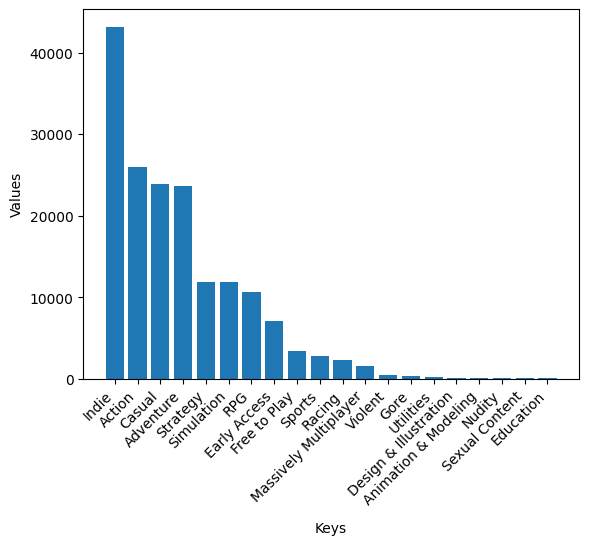

<Figure size 2000x600 with 0 Axes>

In [82]:
plot_dict_bar2(genre_count2)

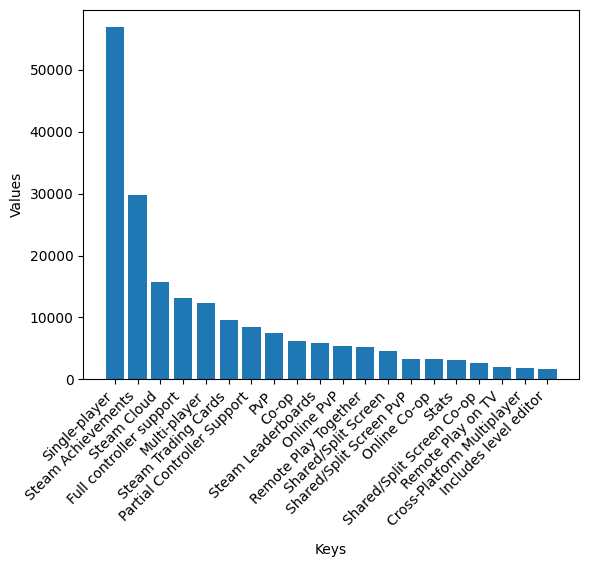

<Figure size 2000x600 with 0 Axes>

In [83]:
plot_dict_bar2(cate_count2)


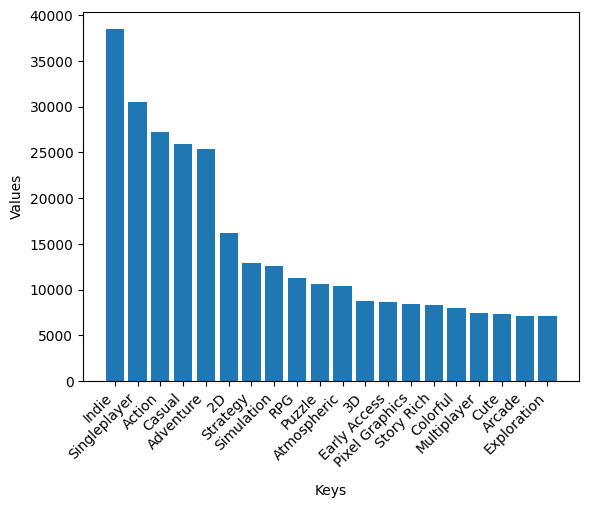

<Figure size 2000x600 with 0 Axes>

In [84]:
plot_dict_bar2(tag_count2)

For categories, I'm going to just look at the following games that have:

* Single-Player
* Muli-player
* controller Support (Full or Partial)




# end experiment